# Group 70: Project Proposal
## Predicting Cancer Mortality Rates Through Varying Demographic Data

### Introduction
Cancer is one of the leading causes of death in the developed world. Therefore, it is crucial that we investigate the links between cancer mortality rates and demographic data. Using a dataset imported from data.world that aggregates data from the American Community Survey, clinicaltrails.gov (a public clinical trial database), and the National Cancer Institute, we hope to predict the cancer mortality rate of a county using demographic data. Our question is the following: if given the median age and income of a county in the United States, what will be the cancer mortality rate of that county? Our claim is that a county with a higher median age and lower median income will lead to higher cancer mortality rates. We chose median age and median income as our variables because prior research (cited below) demonstrate a significant relationship between these variables and cancer mortality.

### Loading libraries

In [11]:
install.packages(c("leaps"))
library(tidyverse) # to perform operations on the data set
library(repr) # to set graph plot size and performing some operations on data set
library(tidymodels)
library(leaps)
library(GGally)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



### Reading data from URL

In [12]:
# Reading the training data set from the Web into R
url <- "https://raw.githubusercontent.com/mimilht/dsci100-proj-group70/main/cancer_reg.csv"
cancer <- read_csv(url)
head(cancer)

set.seed(100)

Rows: 3047 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): binnedInc, Geography
dbl (32): avgAnnCount, avgDeathsPerYear, TARGET_deathRate, incidenceRate, me...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,⋯,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1397,469,164.9,489.8,61898,260131,11.2,499.74820,"(61494.5, 125635]",39.3,⋯,NA,41.6,32.9,14.0,81.78053,2.5947283,4.8218571,1.8434785,52.85608,6.118831
173,70,161.3,411.6,48127,43269,18.6,23.11123,"(48021.6, 51046.4]",33.0,⋯,53.8,43.6,31.1,15.3,89.22851,0.9691025,2.2462326,3.7413515,45.37250,4.333096
102,50,174.7,349.7,49348,21026,14.6,47.56016,"(48021.6, 51046.4]",45.0,⋯,43.5,34.9,42.1,21.1,90.92219,0.7396734,0.4658982,2.7473583,54.44487,3.729488
427,202,194.8,430.4,44243,75882,17.1,342.63725,"(42724.4, 45201]",42.8,⋯,40.3,35.0,45.3,25.0,91.74469,0.7826260,1.1613587,1.3626432,51.02151,4.603841
57,26,144.4,350.1,49955,10321,12.5,0.00000,"(48021.6, 51046.4]",48.3,⋯,43.9,35.1,44.0,22.7,94.10402,0.2701920,0.6658304,0.4921355,54.02746,6.796657
428,152,176.0,505.4,52313,61023,15.6,180.25990,"(51046.4, 54545.6]",45.4,⋯,38.8,32.6,43.2,20.2,84.88263,1.6532052,1.5380566,3.3146354,51.22036,4.964476


### Cleaning and Wrangling Data into Tidydata Format

In [44]:
cancer_data <- cancer |> filter(na.rm = TRUE)

cancer_filter <- cancer_data |> select(-PctPrivateCoverageAlone, -PctEmployed16_Over, 
                                       -PctSomeCol18_24, -Geography, -avgAnnCount,
                                      -avgDeathsPerYear, -incidenceRate, -studyPerCap, -PctOtherRace, -binnedInc)
colSums(!is.na(cancer_filter))
cancer_clean <- na.omit(cancer_filter)
head(cancer_clean)

set.seed(100)
cancer_split <- initial_split(data = cancer_filter, prop = 0.75, strata = TARGET_deathRate)
cancer_training <- training(cancer_split)
cancer_testing <- testing(cancer_split)


bestsub.model <- regsubsets(TARGET_deathRate ~ medIncome + 
                              popEst2015 + povertyPercent + 
                              MedianAge + MedianAgeMale + 
                              MedianAgeFemale + AvgHouseholdSize + 
                              PercentMarried + PctNoHS18_24 +
                              PctHS18_24 + PctBachDeg18_24 +
                              PctHS25_Over + PctBachDeg25_Over +
                              PctUnemployed16_Over + PctPrivateCoverage +
                              PctEmpPrivCoverage + PctPublicCoverage +
                              PctPublicCoverageAlone + PctWhite +
                              PctBlack + PctAsian +
                              PctMarriedHouseholds + BirthRate, 
                            data = cancer_training, nvmax = 10)
#cancer_data <- cancer_data |> 
#    select(medIncome, MedianAge, TARGET_deathRate) |> # selecting only relevant columns
#    filter(na.rm = TRUE) |> # removing observations with N/A values
#    filter(MedianAge <= 100) |> # removing observations with erroneous median age
#    rename(MedianIncome = medIncome,
#           DeathsPerCapita = TARGET_deathRate) # renaming columns to consistent format
#head(cancer_data) # display first 6 rows of data


TARGET_deathRate              medIncome             popEst2015 
                  3047                   3047                   3047 
        povertyPercent              MedianAge          MedianAgeMale 
                  3047                   3047                   3047 
       MedianAgeFemale       AvgHouseholdSize         PercentMarried 
                  3047                   3047                   3047 
          PctNoHS18_24             PctHS18_24        PctBachDeg18_24 
                  3047                   3047                   3047 
          PctHS25_Over      PctBachDeg25_Over   PctUnemployed16_Over 
                  3047                   3047                   3047 
    PctPrivateCoverage     PctEmpPrivCoverage      PctPublicCoverage 
                  3047                   3047                   3047 
PctPublicCoverageAlone               PctWhite               PctBlack 
                  3047                   3047                   3047 
              PctAsian   PctMarriedHouseholds              BirthRate 
                  3047                   3047                   3047

TARGET_deathRate,medIncome,popEst2015,povertyPercent,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,⋯,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctMarriedHouseholds,BirthRate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
164.9,61898,260131,11.2,39.3,36.9,41.7,2.54,52.5,11.5,⋯,8.0,75.1,41.6,32.9,14.0,81.78053,2.5947283,4.8218571,52.85608,6.118831
161.3,48127,43269,18.6,33.0,32.2,33.7,2.34,44.5,6.1,⋯,7.8,70.2,43.6,31.1,15.3,89.22851,0.9691025,2.2462326,45.37250,4.333096
174.7,49348,21026,14.6,45.0,44.0,45.8,2.62,54.2,24.0,⋯,7.0,63.7,34.9,42.1,21.1,90.92219,0.7396734,0.4658982,54.44487,3.729488
194.8,44243,75882,17.1,42.8,42.2,43.4,2.52,52.7,20.2,⋯,12.1,58.4,35.0,45.3,25.0,91.74469,0.7826260,1.1613587,51.02151,4.603841
144.4,49955,10321,12.5,48.3,47.8,48.9,2.34,57.8,14.9,⋯,4.8,61.6,35.1,44.0,22.7,94.10402,0.2701920,0.6658304,54.02746,6.796657
176.0,52313,61023,15.6,45.4,43.5,48.0,2.58,50.4,29.9,⋯,12.9,60.0,32.6,43.2,20.2,84.88263,1.6532052,1.5380566,51.22036,4.964476


In [45]:
summary(bestsub.model)

Subset selection object
Call: regsubsets.formula(TARGET_deathRate ~ medIncome + popEst2015 + 
    povertyPercent + MedianAge + MedianAgeMale + MedianAgeFemale + 
    AvgHouseholdSize + PercentMarried + PctNoHS18_24 + PctHS18_24 + 
    PctBachDeg18_24 + PctHS25_Over + PctBachDeg25_Over + PctUnemployed16_Over + 
    PctPrivateCoverage + PctEmpPrivCoverage + PctPublicCoverage + 
    PctPublicCoverageAlone + PctWhite + PctBlack + PctAsian + 
    PctMarriedHouseholds + BirthRate, data = cancer_training, 
    nvmax = 10)
23 Variables  (and intercept)
                       Forced in Forced out
medIncome                  FALSE      FALSE
popEst2015                 FALSE      FALSE
povertyPercent             FALSE      FALSE
MedianAge                  FALSE      FALSE
MedianAgeMale              FALSE      FALSE
MedianAgeFemale            FALSE      FALSE
AvgHouseholdSize           FALSE      FALSE
PercentMarried             FALSE      FALSE
PctNoHS18_24               FALSE      FALSE
PctHS18_2

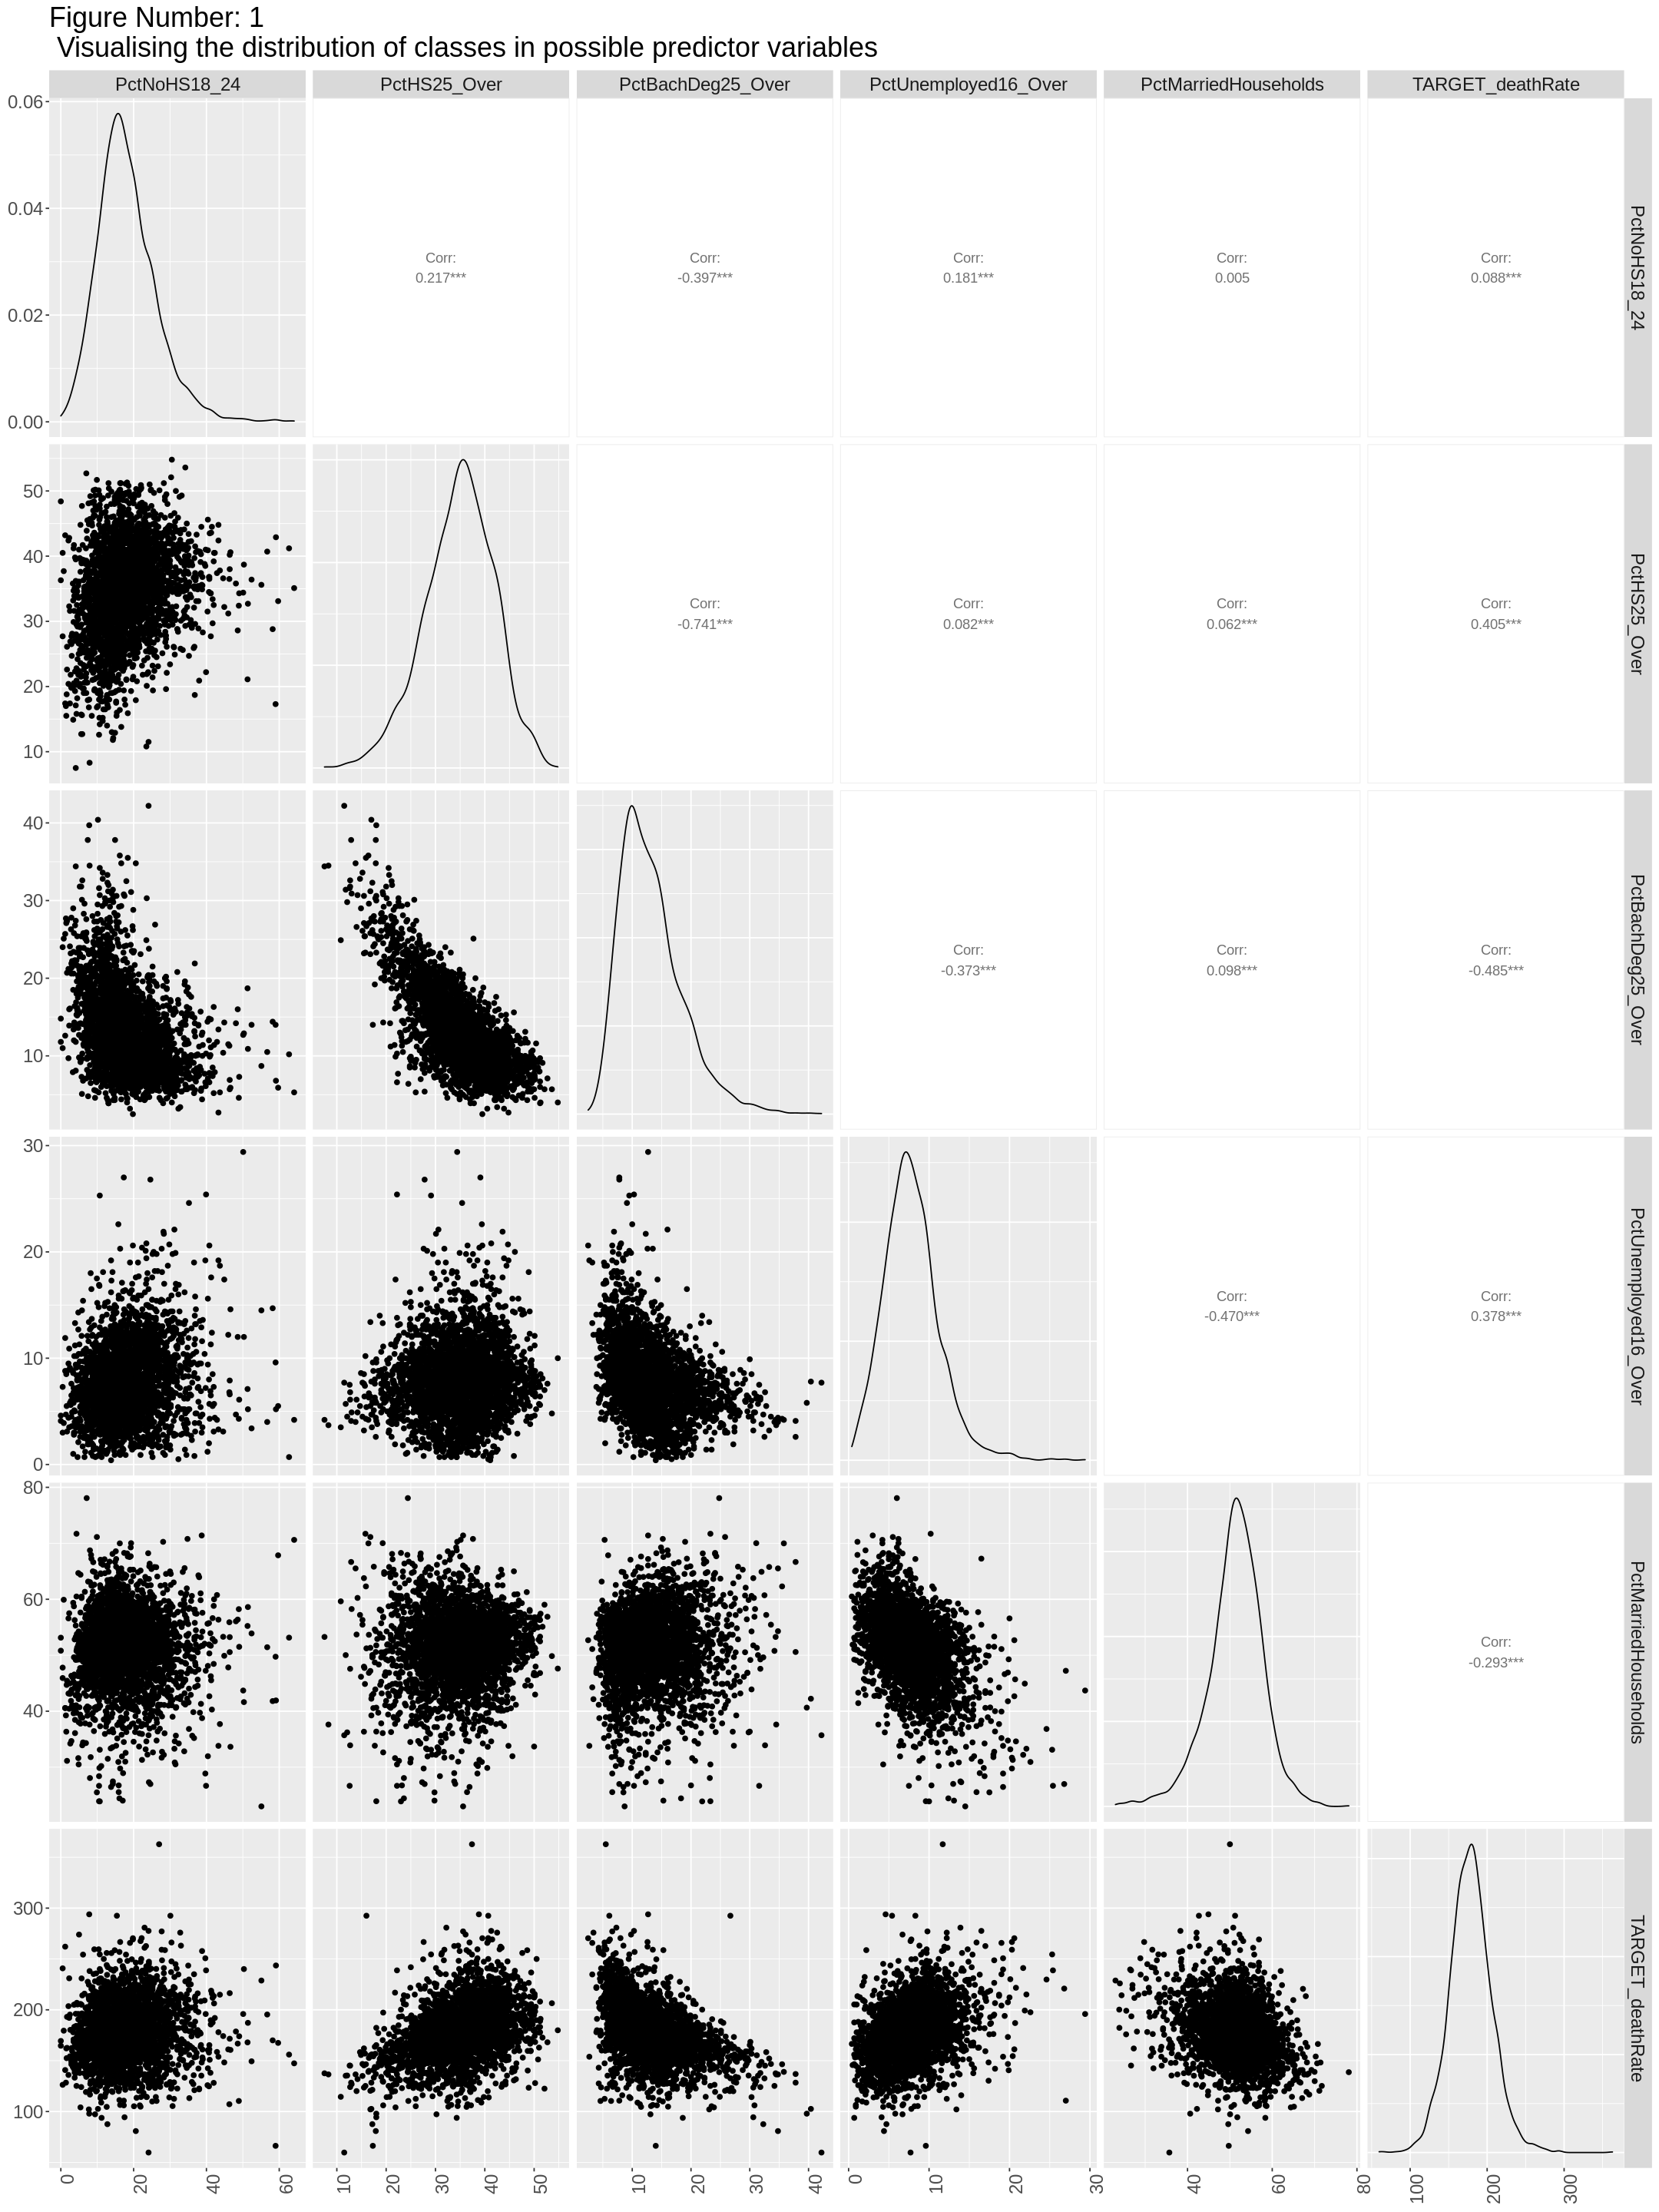

In [50]:
options(repr.plot.width = 18, repr.plot.height = 24)
paired_plot <- cancer_filter |>
               select(PctNoHS18_24, PctHS25_Over, PctBachDeg25_Over, PctUnemployed16_Over, PctMarriedHouseholds, TARGET_deathRate) |>
               ggpairs() + #colouring the data points by the UNS column (which conatins the classes to be predicted)
               ggtitle("Figure Number: 1 \n Visualising the distribution of classes in possible predictor variables") +
               theme(text = element_text(size = 18)) +
               theme(axis.text.x = element_text(angle = 90, hjust = 1)) # adjusting the x-axis labels so they don't overlap wiht each other and are clearly visible

paired_plot

### Summarizing Data

In [52]:
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_recipe <- recipe(TARGET_deathRate ~ PctNoHS18_24 + PctHS25_Over + PctBachDeg25_Over + PctUnemployed16_Over + PctMarriedHouseholds, 
                   data = cancer_training)

lm_fit <- workflow() |>
  add_recipe(lm_recipe) |>
  add_model(lm_spec) |>
  fit(data = cancer_training)

lm_test_results <- lm_fit |>
  predict(cancer_testing) |>
  bind_cols(cancer_testing) |>
  metrics(truth = TARGET_deathRate, estimate = .pred)

lm_test_results

summary_stats <- cancer_clean |>
    select(PctNoHS18_24, PctHS25_Over, PctBachDeg25_Over, PctUnemployed16_Over, PctMarriedHouseholds, TARGET_deathRate) |>
    map_df(sd)
summary_stats

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,23.6036475
rsq,standard,0.3137153
mae,standard,17.5682071


PctNoHS18_24,PctHS25_Over,PctBachDeg25_Over,PctUnemployed16_Over,PctMarriedHouseholds,TARGET_deathRate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.093064,7.034924,5.394756,3.452371,6.572814,27.75151


### Visualizing Data

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 8) # adjusts graph size

cancer_plot_age <- ggplot(cancer_training, aes(x = MedianAge)) +
    geom_histogram() + # using histogram to show distribution
    labs(x = "Median Age of US Counties", y = "Frequency") + # label axes
    ggtitle("Distribution of Median Age of US Counties") + # create graph title
    theme(text = element_text(size = 20)) # adjust text size
cancer_plot_income <- ggplot(cancer_training, aes(x = MedianIncome)) +
    geom_histogram() +
    labs(x = "Median Income of US Counties", y = "Frequency") +
    ggtitle("Distribution of Median Income of US Counties (US Dollars)") +
    theme(text = element_text(size = 20))
cancer_plot_age
cancer_plot_income

In [ ]:
### Data Analysis

In [ ]:
cancer

In [ ]:
cancer_filter <- cancer |> filter(na.rm = TRUE)
cancer_filter
colSums(!is.na(cancer_filter))

In [ ]:
# get rid PctSomeCol18_24, PctEmployed16_Over, PctPrivateCoverageAlone because they don't have 3047 observations
cancer_filter <- cancer_filter |> select(-PctSomeCol18_24, PctEmployed16_Over,PctPrivateCoverageAlone)
cancer_filter

In [ ]:
cancer_subset <- cancer_training |> 
  select(Class, 
         Smoothness, 
         Concavity, 
         Perimeter, 
         Irrelevant1, 
         Irrelevant2, 
         Irrelevant3)

names <- colnames(cancer_subset |> select(-Class))

cancer_subset

### Method

To prepare our data for analysis, we started out with downloading the dataset from the web and publishing the data on our group GitHub. We then pulled the dataset and read it on Jupyter using a URL.

Then we decided to select and filter out the columns that are required for our analysis and decided to leave the rest out. We agreed to select the Median_Age and Median_Income columns as predictors in our research. We filtered our data to only contain observations of counties with median ages less than 100 to sieve out faulty and inaccurate data. We also removed cells that have missing data (NA). We also changed the column names to make it more human readable and easier to interpret.

The dataset required minimal cleaning as the data was in a relatively tidy format, and there wasn’t any metadata attached in the file nor was there any mismatch of rows and columns.

We are using median income/age to predict cancer mortality (average death per year). We hope to analyze our data using a regression model, specifically linear regression. However, if linear regression proves to be inappropriate for predicting the mortality rate, we will consider exploring the use of a KNN regression model.

### Discussion

We expect to find a positive correlation between the median age of counties and the cancer mortality rate (deaths per capita). We also expect that mortality rate increases with a decrease in median income.

We hope that our findings can affirm a greater need for healthcare access and support in geographic areas with lower-income and elderly populations. The results of this study could lead to other research questions investigating the trends between demographic data and other illnesses, such as heart disease, diabetes, and obesity. Our findings could also help in making decisions about distribution of healthcare infrastructure and facilities according to more vulnerable demographics.

### Sources cited
1) Siegel, R. L., Miller, K. D., Wagle, N. S., & Jemal, A. (2023). Cancer statistics, 2023. CA: A Cancer Journal for Clinicians, 73(1), 17–48. https://doi.org/10.3322/caac.21763 
2) Vaccarella, S., Georges, D., Bray, F., Ginsburg, O., Charvat, H., Martikainen, P., Brønnum-Hansen, H., Deboosere, P., Bopp, M., Leinsalu, M., Artnik, B., Lorenzoni, V., De Vries, E., Marmot, M., Vineis, P., Mackenbach, J., & Nusselder, W. (2023). Socioeconomic inequalities in cancer mortality between and within countries in Europe: A population-based study. The Lancet Regional Health - Europe, 25, 100551. https://doi.org/10.1016/j.lanepe.2022.100551 